### Finding Players from the Validation dataset (Training-Test-Validation Split)

,Feature,Missing Count,Missing %
CS%,CS%,2651,92.89
Save%,Save%,2648,92.78
PSxG/SoT,PSxG/SoT,2648,92.78
AvgDist,AvgDist,2646,92.71
Cmp%_stats_keeper_adv,Cmp%_stats_keeper_adv,2644,92.64
...,...,...,...
Nation_stats_passing,Nation_stats_passing,7,0.25
Nation_stats_possession,Nation_stats_possession,7,0.25
Nation_stats_defense,Nation_stats_defense,7,0.25
Nation_stats_passing_types,Nation_stats_passing_types,7,0.25


2854
160
2642


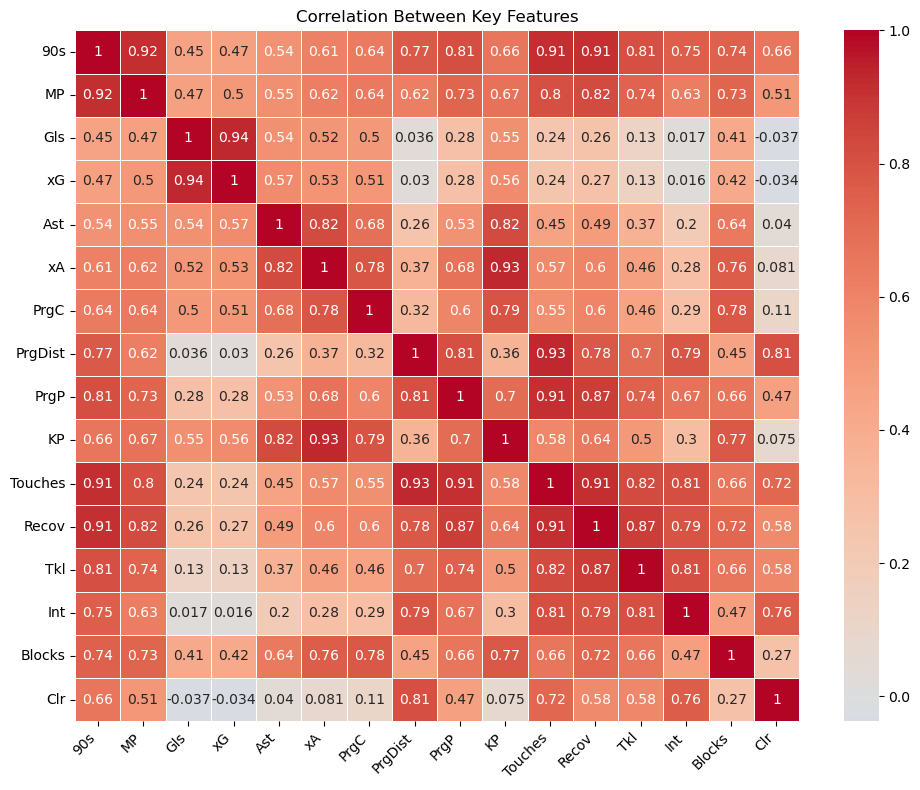

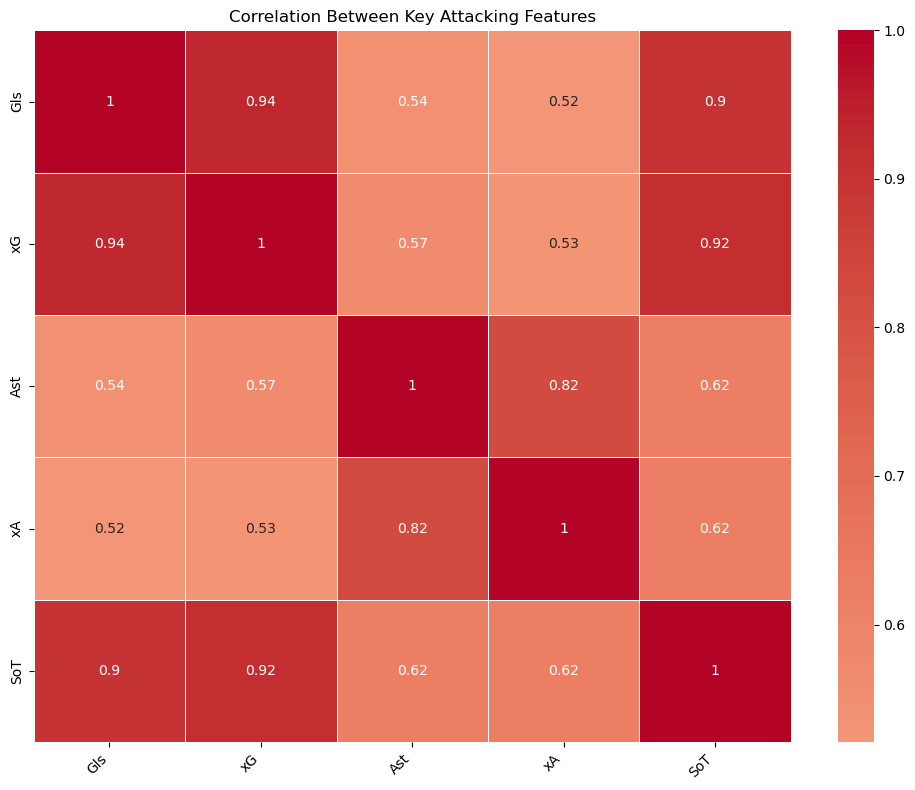

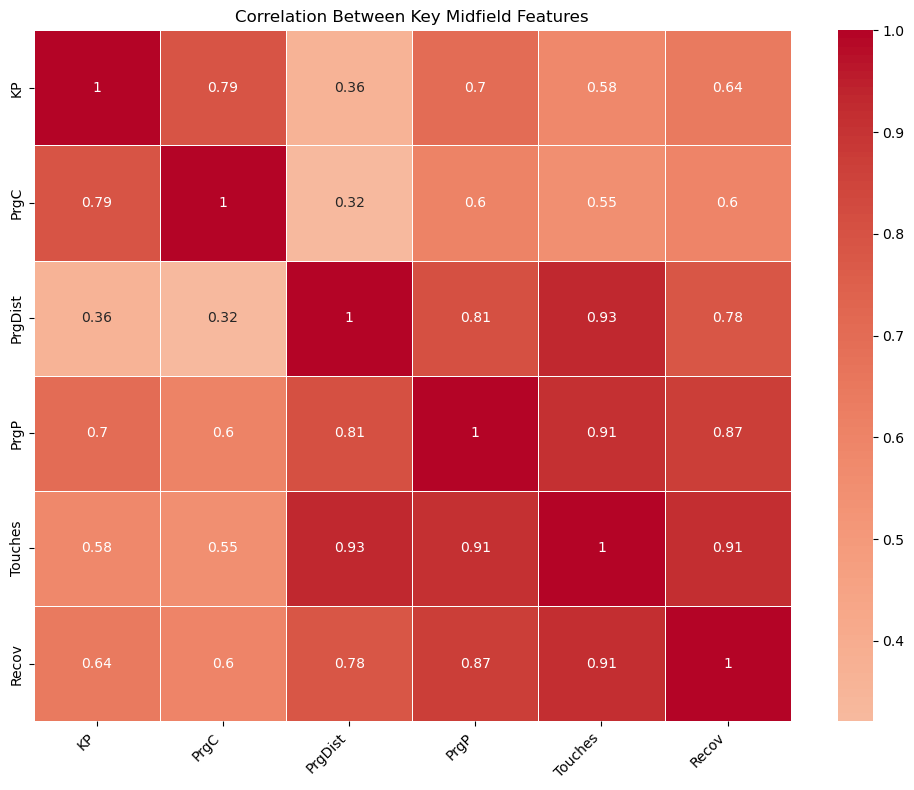

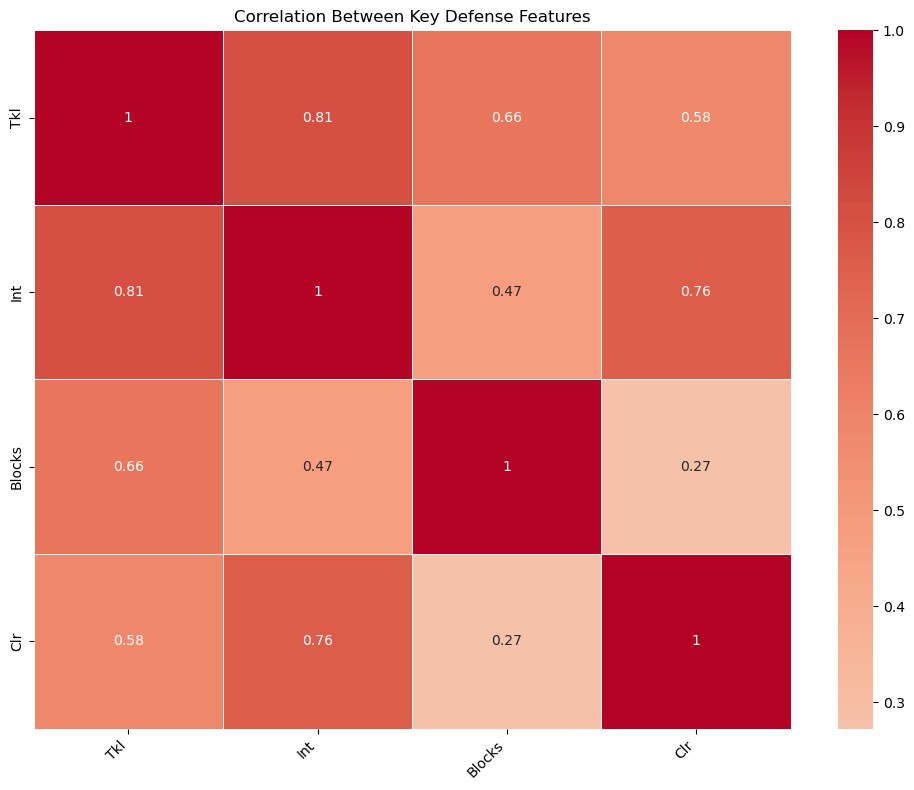

In [223]:
import pandas as pd

# Step 1: Load the original dataset
df = pd.read_csv("players_data-2024_2025(1).csv")
missing_values = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)

missing_table = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing %': missing_percent.round(2)
})

# Filter only features with missing values
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

import pandas as pd
from IPython.display import display
display(missing_table)
print(len(df))  # Check how many rows we have

# Step 2: Keep identifying info separately (for later labeling/display)
player_info = df[['Player', 'Nation', 'Pos', 'Squad']].copy()


# Step 3: Create a new dataframe with just the numeric features for PCA
df_numeric = df.select_dtypes(include='number') # Check how many numeric columns we have
df_numeric_all = df_numeric.copy()
player_info_all = player_info.copy()
# Step 4: Drop high-missing-value columns 
drop_prefixes = (
    'Rk_stats_',
    'Nation_stats_',
    'Comp_stats_',
    'Pos_stats_',
    'Age_stats_',
    'Born_stats_'
)
columns_to_drop = [col for col in df_numeric.columns if col.startswith(drop_prefixes) or col == 'Rk']
df_numeric = df_numeric.drop(columns=columns_to_drop)

df_numeric = df_numeric.dropna(thresh=len(df_numeric) -1000, axis=1)# Check how many numeric columns we have after dropping

# Step 5: Drop rows with any missing values
df_numeric = df_numeric.fillna(0)  # or use median/mean imputation
player_info = player_info.loc[df_numeric.index].reset_index(drop=True)

# Then filter out goalkeepers
player_info = player_info[player_info['Pos'].str.contains("GK") == False]
df_numeric = df_numeric.reset_index(drop=True)
df_numeric = df_numeric.loc[player_info.index]
print(len(df_numeric.columns)) 
print(len(df_numeric))  # Check how many rows we have after filtering


# Assuming df_numeric is your cleaned, unscaled numeric dataset
selected_features = [
    '90s',          # Minutes played (Involvement)
    'MP',      # Matches played (Involvement)  
    'Gls',          # Goals scored (Attacking)
    'xG',           # Expected goals (Attacking)
    'Ast',          # Assists (Creativity)
    'xA',           # Expected assists (Creativity)
    'PrgC',
    'PrgDist', # Progressive distance (Ball progression)
    'PrgP' ,        # Progressive passes (Ball progression)
    'KP',   # Key passes (Creativity)
    'Touches' ,   
    'Recov',    # Key passes (Passing)
    'Tkl',          # Tackles (Defense)
    'Int',          # Interceptions (Defense)
    'Blocks',       # Blocks (Defense)
    'Clr'        # Clearances (Defense)                                                                                               # Dribbles (Ball control)     # Involvement        # Recoveries (Ball control)
]



import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_numeric[selected_features].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Attacking Correlations
selected_featuresatt = [    # Matches played (Involvement)  
    'Gls',          # Goals scored (Attacking)
    'xG',           # Expected goals (Attacking)
    'Ast',          # Assists (Creativity)
    'xA',           # Expected assists (Creativity)
    'SoT'           # Shots on Target(Attacking)                                                                                                                                                                             # Dribbles (Ball control)     # Involvement        # Recoveries (Ball control)
]



import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_numeric[selected_featuresatt].corr()

# attack Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Attacking Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Passing Correlations
selected_featurespass = [
    'KP',   # Key passes (Creativity)
    'PrgC',
    'PrgDist', # Progressive distance (Ball progression)
    'PrgP' ,        # Progressive passes (Ball progression)
    'Touches' ,   
    'Recov'    # Key passes (Passing)
]

corr_matrix = df_numeric[selected_featurespass].corr()

# passing Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Midfield Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Defense Correlations
selected_featuresdef = [
    'Tkl',          # Tackles (Defense)
    'Int',          # Interceptions (Defense)
    'Blocks',       # Blocks (Defense)
    'Clr'        # Clearances (Defense)                                                                                               # Dribbles (Ball control)     # Involvement        # Recoveries (Ball control)
]      

corr_matrix = df_numeric[selected_featuresdef].corr()
# Defense Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Defense Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


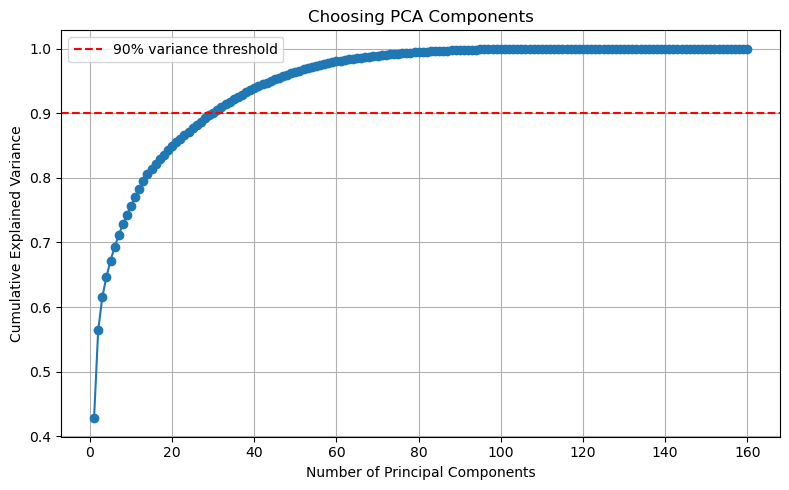

Number of PCA components to retain 90% variance: 30


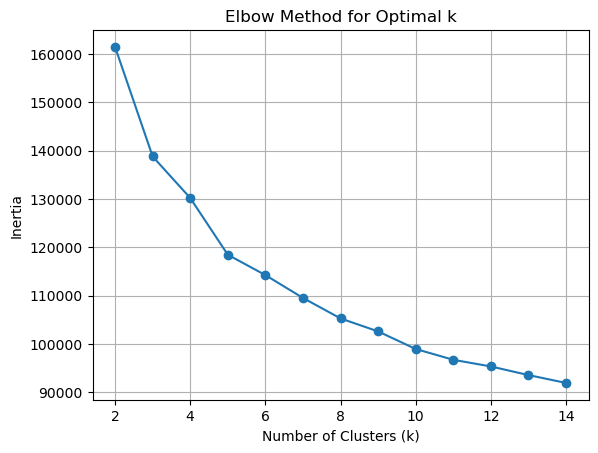


Best k by elbow method: 5


In [224]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


## Scaling features
from sklearn.preprocessing import StandardScaler

# Step 1: Split the original (unscaled) numeric data
X_temp, X_test, info_temp, info_test = train_test_split(
    df_numeric, player_info, test_size=0.2, random_state=42)

X_train, X_val, info_train, info_val = train_test_split(
    X_temp, info_temp, test_size=0.25, random_state=42)  # 60/20/20 split

# Step 2: Fit the scaler ONLY on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform val and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Elbow method to determine optimal number of PCA components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fit PCA on the scaled dataset
pca = PCA()
pca.fit(X_train_scaled)

# Step 2: Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Plot the PCA components graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing PCA Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Print the number of components to reach 90% variance
n_components_90 = np.argmax(explained_variance >= 0.90) + 1
print(f"Number of PCA components to retain 90% variance: {n_components_90}")


#PCA on training

# Step 2: Fit PCA only on training set
pca = PCA(n_components=45)
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 3: Transform validation and test sets
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

## how many k
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def find_best_k_by_inertia(X_train_pca, k_range=range(2, 15)):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_train_pca)
        inertias.append(kmeans.inertia_)

    # Plot the inertia curve
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    # Automatically find elbow (max second derivative method)
    inertia_array = np.array(inertias)
    first_derivative = np.diff(inertia_array)
    second_derivative = np.diff(first_derivative)

    # Add +2 to align with k_range because of double diff
    elbow_k = k_range[np.argmin(second_derivative) + 2]

    print(f"\nBest k by elbow method: {elbow_k}")
    return elbow_k

best_k = find_best_k_by_inertia(X_train_pca, k_range=range(2, 15))

In [225]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Preserved:", pca.explained_variance_ratio_.sum())

Explained Variance Ratio: [0.42771774 0.13601627 0.05135774 0.0314304  0.02554079 0.02086957
 0.0185476  0.01667008 0.01463883 0.01412868 0.01348718 0.01309028
 0.01135421 0.01093385 0.00819061 0.00754749 0.0073486  0.00717528
 0.00669618 0.00647537 0.00601672 0.00573214 0.00549728 0.00537581
 0.00530778 0.00513139 0.00498491 0.00486767 0.00472009 0.00441027
 0.00434546 0.00420379 0.00406777 0.00399017 0.00392536 0.0037208
 0.00367481 0.0034168  0.00325185 0.00315803 0.00302148 0.00287329
 0.00278005 0.00269326 0.00256995]
Total Variance Preserved: 0.9529536513912844


In [226]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
train_labels = kmeans.fit_predict(X_train_pca)
val_labels = kmeans.predict(X_val_pca)
test_labels = kmeans.predict(X_test_pca)

In [227]:
info_train['Cluster'] = train_labels
info_val['Cluster'] = val_labels
info_test['Cluster'] = test_labels

In [228]:
print(info_train.columns)

Index(['Player', 'Nation', 'Pos', 'Squad', 'Cluster'], dtype='object')


In [229]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
filtered_test = info_test[info_test['Pos'].str.contains("MF|FW|DF", case=False)]
filtered_test_pca = X_test_pca[info_test.index.get_indexer(filtered_test.index)]

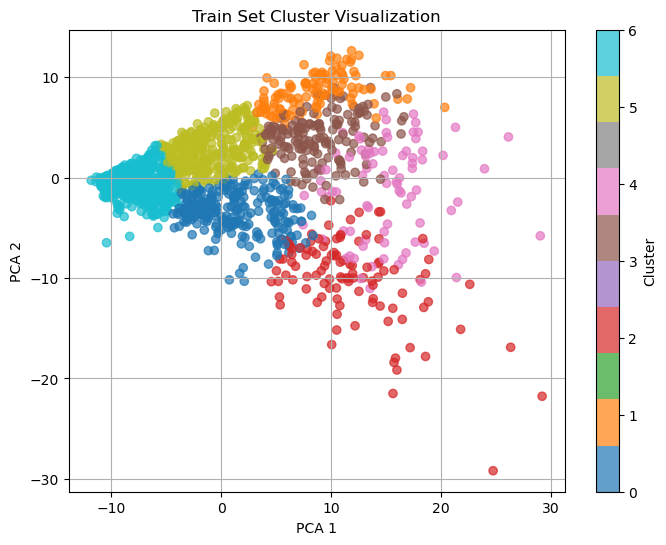

In [230]:
## Cluster Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters_2D(X_pca, labels, info_table, title="Cluster Visualization (2D)"):
    pca_2d = PCA(n_components=2)
    reduced = pca_2d.fit_transform(X_pca)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_clusters_2D(X_train_pca, train_labels, info_train, title="Train Set Cluster Visualization")

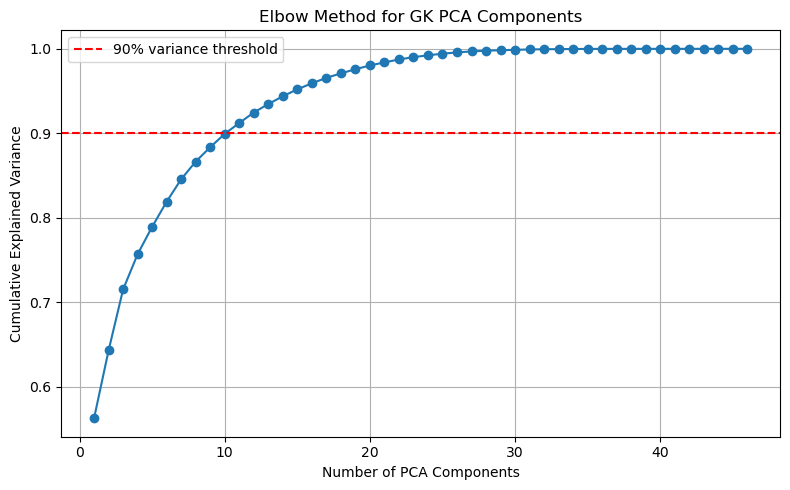

Number of PCA components to retain 90% variance (GK): 11


In [231]:
## Goalkeepers 

gk_info = player_info_all[player_info_all['Pos'].str.contains("GK", na=False)]
gk_numeric = df_numeric_all.loc[gk_info.index]
gk_info = gk_info.reset_index(drop=True)
gk_numeric = gk_numeric.reset_index(drop=True)
keep_columns= ['MP','Starts','Min','90s','PrgP','Cmp','Att','Cmp%', 'TotDist', 'PrgDist', 'Touches', 'Def Pen','Carries','Mn/MP',
               'Min%','Compl','unSub','PPM','Won','Won%','GA','GA90','SoTA','Saves','Save%',
               'W','D','L','CS','CS%','PKA','PKsv','PSxG','PSxG/SoT','PSxG+/-','/90','Att (GK)','Thr'
               ,'Launch%','AvgLen','Opp','Stp','Stp%','#OPA','#OPA/90','AvgDist']
gk_numeric = gk_numeric[keep_columns]
gk_numeric = gk_numeric.fillna(0)

# First split into temp and test
X_temp_gk, X_test_gk, info_temp_gk, info_test_gk = train_test_split(
    gk_numeric, gk_info, test_size=0.2, random_state=42)

# Now split temp into train and validation
X_train_gk, X_val_gk, info_train_gk, info_val_gk = train_test_split(
    X_temp_gk, info_temp_gk, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

scaler_gk = StandardScaler()

# Fit on train set only
X_train_scaled_gk = scaler_gk.fit_transform(X_train_gk)

# Transform val and test sets
X_val_scaled_gk = scaler_gk.transform(X_val_gk)
X_test_scaled_gk = scaler_gk.transform(X_test_gk)

pca_gk = PCA()
pca_gk.fit(X_train_scaled_gk)

# Calculate cumulative explained variance
explained_variance_gk = np.cumsum(pca_gk.explained_variance_ratio_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_gk) + 1), explained_variance_gk, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance threshold')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Elbow Method for GK PCA Components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Choose number of components to retain 90% variance
n_components_gk = np.argmax(explained_variance_gk >= 0.90) + 1
print(f"Number of PCA components to retain 90% variance (GK): {n_components_gk}")



In [232]:
# GK PCA
pca_gk = PCA(n_components=n_components_gk)
X_train_pca_gk = pca_gk.fit_transform(X_train_scaled_gk)
X_val_pca_gk = pca_gk.transform(X_val_scaled_gk)
X_test_pca_gk = pca_gk.transform(X_test_scaled_gk)

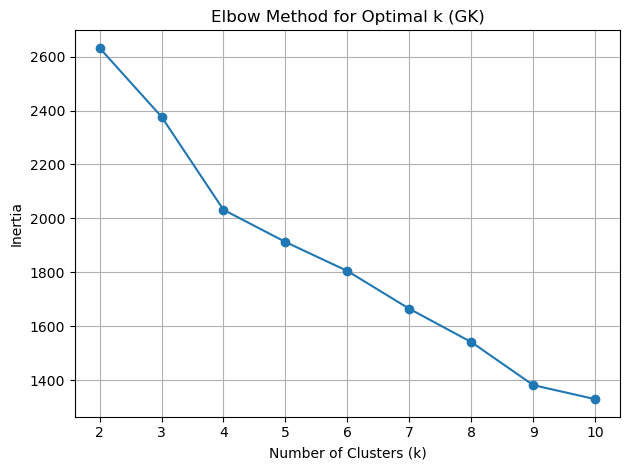

Best k (GK) by elbow method: 4


In [233]:
from sklearn.cluster import KMeans

def find_best_k_by_inertia(X, k_range=range(2, 11)):
    inertias = []
    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)

    # Plot
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k (GK)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Second derivative trick to auto-select
    first_deriv = np.diff(inertias)
    second_deriv = np.diff(first_deriv)
    elbow_k = k_range[np.argmin(second_deriv) + 2]
    print(f"Best k (GK) by elbow method: {elbow_k}")
    return elbow_k

best_k_gk = find_best_k_by_inertia(X_train_pca_gk)

In [234]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on goalkeeper PCA data
kmeans_gk = KMeans(n_clusters=best_k_gk, random_state=42)
train_labels_gk = kmeans_gk.fit_predict(X_train_pca_gk)

# Optionally apply the model to validation and test sets
val_labels_gk = kmeans_gk.predict(X_val_pca_gk)
test_labels_gk = kmeans_gk.predict(X_test_pca_gk)

# Add cluster labels to player info tables for later inspection
info_train_gk['Cluster'] = train_labels_gk
info_val_gk['Cluster'] = val_labels_gk
info_test_gk['Cluster'] = test_labels_gk

In [235]:
def find_similar_players(player_name, info_train, X_train_pca, info_test, X_test_pca,
                         pos_filter="MF|FW|DF", top_n=20):
    # Get the vector of the target player from train set
    target = info_train[info_train['Player'].str.contains(player_name, case=False)]
    if target.empty:
        print("Player not found!")
        return
    
    # Find the relative position inside the DataFrame
    relative_index = info_train.index.get_loc(target.index[0])
    vector = X_train_pca[relative_index]

    # Filter test set by position
    # Step 1. Get the position of the target player
    target_pos = target['Pos'].values[0]  # e.g., 'MF', 'DF', or 'MF,FW'

# Step 2. Build a regex pattern to include all position codes
# For example: 'MF,FW' → 'MF|FW'
    pos_pattern = '|'.join([pos.strip() for pos in target_pos.split(',')])

# Step 3. Filter test set based on that pattern
    filtered_test = info_test[info_test['Pos'].str.contains(pos_pattern, case=False, na=False)]
    filtered_test_pca = X_test_pca[info_test.index.get_indexer(filtered_test.index)]

    # Find closest players
    distances = cosine_distances(filtered_test_pca, [vector]).ravel()
    closest_indices = distances.argsort()[:top_n]
    similar_players = filtered_test.iloc[closest_indices]

    return similar_players[['Player', 'Pos','Squad', 'Cluster']]




In [236]:
def find_similar_players1(player_name,
                         info_train, X_train_pca,
                         info_test, X_test_pca,
                         info_train_gk=None, X_train_pca_gk=None,
                         info_test_gk=None, X_test_pca_gk=None,
                         top_n=20):
    
    # Search in both field player and GK datasets
    target = info_train[info_train['Player'].str.contains(player_name, case=False)]
    gk_target = info_train_gk[info_train_gk['Player'].str.contains(player_name, case=False)] if info_train_gk is not None else None

    if not target.empty:
        dataset = 'field'
        vector = X_train_pca[info_train.index.get_loc(target.index[0])]
        target_pos = target['Pos'].values[0]
        pos_pattern = '|'.join([pos.strip() for pos in target_pos.split(',')])
        filtered_test = info_test[info_test['Pos'].str.contains(pos_pattern, case=False, na=False)]
        filtered_test_pca = X_test_pca[info_test.index.get_indexer(filtered_test.index)]

    elif gk_target is not None and not gk_target.empty:
        dataset = 'gk'
        vector = X_train_pca_gk[info_train_gk.index.get_loc(gk_target.index[0])]
        target_pos = gk_target['Pos'].values[0]
        filtered_test = info_test_gk.copy()
        filtered_test_pca = X_test_pca_gk
    else:
        print("Player not found!")
        return

    # Find closest players
    distances = cosine_distances(filtered_test_pca, [vector]).ravel()
    closest_indices = distances.argsort()[:top_n]
    similar_players = filtered_test.iloc[closest_indices]

    print(f"Similar players to {player_name} (from {dataset} set):")
    return similar_players[['Player', 'Pos', 'Squad', 'Cluster']]

In [241]:
find_similar_players1("Haaland",
                     info_train, X_train_pca,
                     info_test, X_test_pca,
                     info_train_gk, X_train_pca_gk,
                     info_test_gk, X_test_pca_gk)

Similar players to Haaland (from field set):


,Player,Pos,Squad,Cluster
1670,Jean-Philippe Mateta,FW,Crystal Palace,2
2201,Mateo Retegui,FW,Atalanta,2
1259,Raúl Jiménez,FW,Fulham,2
2153,Javi Puado,"FW,MF",Espanyol,2
1364,Tim Kleindienst,FW,Gladbach,2
706,Boulaye Dia,"MF,FW",Lazio,0
2596,Phillip Tietz,FW,Augsburg,0
1060,Mason Greenwood,"FW,MF",Marseille,2
362,Ange-Yoan Bonny,FW,Parma,2
2115,Roberto Piccoli,FW,Cagliari,2


In [238]:
find_similar_players("Vinicius Júnior", info_train, X_train_pca, info_test, X_test_pca)

,Player,Pos,Squad,Cluster
1159,Son Heung-min,FW,Tottenham,2
238,Bradley Barcola,FW,Paris S-G,2
1010,Jamie Gittens,"FW,MF",Dortmund,2
29,Karim Adeyemi,"FW,MF",Dortmund,2
1419,Takefusa Kubo,"MF,FW",Real Sociedad,2
1187,Callum Hudson-Odoi,"FW,MF",Nott'ham Forest,2
1060,Mason Greenwood,"FW,MF",Marseille,2
1756,Yankuba Minteh,"FW,MF",Brighton,2
2299,Bukayo Saka,"FW,MF",Arsenal,2
2623,Adama Traoré,"FW,MF",Fulham,0
